In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler


In [2]:
# Load trained IDS model
model = joblib.load("../models/ids_random_forest.pkl")

# Load cleaned dataset
df = pd.read_csv("../data/cleaned_cicids2017.csv")

# Features and labels
X = df.drop(columns=["Label", "LabelEncoded"])
y = df["LabelEncoded"]


In [3]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [4]:
y_pred = model.predict(X)


In [7]:
alerts = df[y_pred == 1]

print(f"Total traffic records: {len(df)}")
print(f"Total attacks detected: {len(alerts)}\n")

# Adjust column names based on what exists
columns_to_show = ['Label', 'Protocol', 'Src IP', 'Dst IP']  # update if your names are slightly different
columns_to_show = [col for col in columns_to_show if col in alerts.columns]

print("Sample alerts:")
print(alerts[columns_to_show].head(10))

Total traffic records: 2827876
Total attacks detected: 557009

Sample alerts:
        Label
6902   BENIGN
7120   BENIGN
13229  BENIGN
14965  BENIGN
15046  BENIGN
17766  BENIGN
18871    DDoS
18872    DDoS
18873    DDoS
18874    DDoS


In [8]:
alerts.to_csv("../data/soc_alerts.csv", index=False)
print("Alerts saved to data/soc_alerts.csv ✅")


Alerts saved to data/soc_alerts.csv ✅


<Figure size 600x500 with 0 Axes>

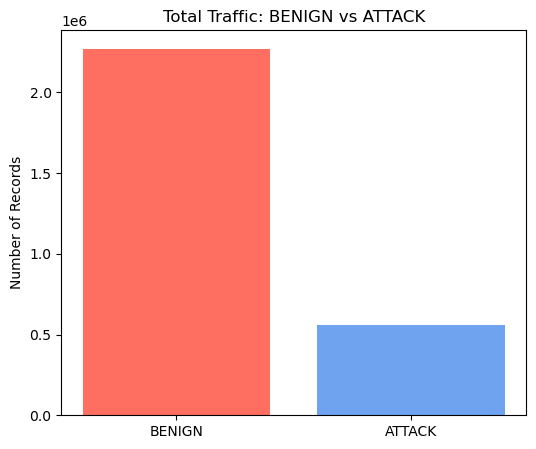

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count BENIGN vs ATTACK
traffic_counts = df['LabelEncoded'].map({0:'BENIGN', 1:'ATTACK'}).value_counts()

plt.figure(figsize=(6,5))
plt.figure(figsize=(6,5))
plt.bar(traffic_counts.index, traffic_counts.values, color=["#FF6F61","#6FA3EF"])
plt.title("Total Traffic: BENIGN vs ATTACK")
plt.ylabel("Number of Records")
plt.show()

C:\Users\SUHAIB\AppData\Local\Temp\ipykernel_18368\4032015940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_types.index, y=attack_types.values, palette="magma")


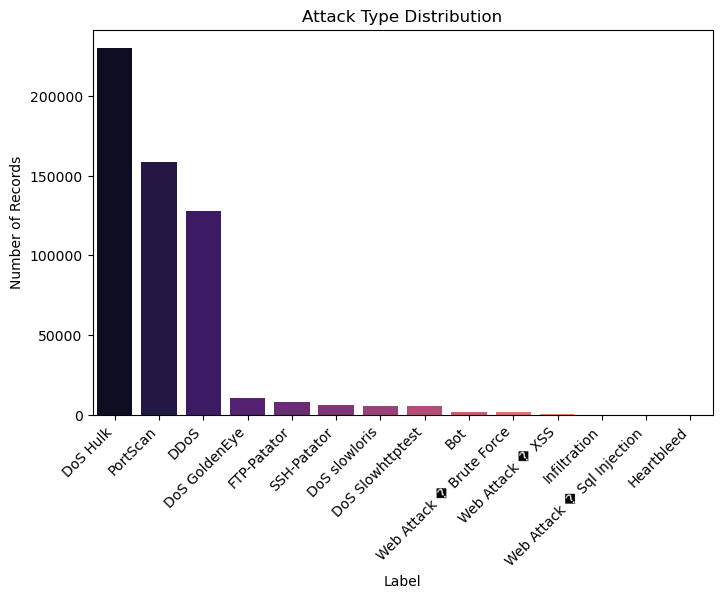

In [16]:
# Count attacks by type (exclude BENIGN)
attack_types = df[df['LabelEncoded']==1]['Label'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=attack_types.index, y=attack_types.values, palette="magma")
plt.title("Attack Type Distribution")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Records")
plt.show()


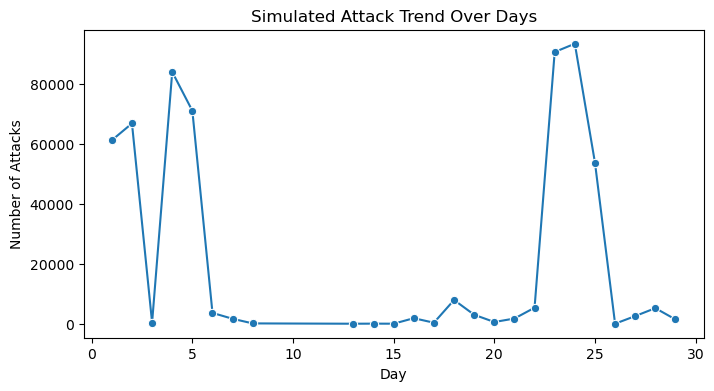

In [18]:
# Create a fake 'Day' column by dividing dataset into chunks
df['Day'] = (df.index // 100000) + 1  # Every 100k rows = 1 “day”

# Count attacks per day
attack_trend = df[df['LabelEncoded']==1].groupby('Day').size()

# Plot trend
plt.figure(figsize=(8,4))
sns.lineplot(x=attack_trend.index, y=attack_trend.values, marker='o')
plt.title("Simulated Attack Trend Over Days")
plt.ylabel("Number of Attacks")
plt.xlabel("Day")
plt.show()
